# Redesigned LSTM Model for Time-Series Forecasting

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:


# Load your dataset
file_path = "/superstoref.csv"  # Replace with the actual dataset path
data = pd.read_csv(file_path)

# Convert 'Order Date' to datetime and set it as the index
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data.set_index('Order Date', inplace=True)

# Use the 'Sales' column for time-series analysis
time_series_data = data['Sales']

# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(time_series_data.values.reshape(-1, 1))

# Prepare data for LSTM
def prepare_lstm_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Adjust the sequence length
X, y = prepare_lstm_data(data_normalized, sequence_length)

# Reshape data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (7816, 30, 1)
Testing Data Shape: (1954, 30, 1)


In [ ]:


# Redesign the LSTM model
redesigned_model = Sequential()

# First LSTM layer with more neurons
redesigned_model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
redesigned_model.add(Dropout(0.3))  # Higher dropout rate

# Second LSTM layer
redesigned_model.add(LSTM(50, activation='tanh', return_sequences=True))
redesigned_model.add(Dropout(0.3))

# Third LSTM layer without return_sequences
redesigned_model.add(LSTM(50, activation='tanh'))
redesigned_model.add(Dropout(0.3))

# Add two dense layers
redesigned_model.add(Dense(50, activation='relu'))  # Additional dense layer
redesigned_model.add(Dense(1))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Compile the model
redesigned_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:


# Display the redesigned model summary
redesigned_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,801 (366.41 KB)

 Trainable params: 93,801 (366.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


# Train the redesigned model
redesigned_history = redesigned_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 8.5613e-04 - mae: 0.0122 - val_loss: 8.6017e-04 - val_mae: 0.0117
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - loss: 6.2497e-04 - mae: 0.0114 - val_loss: 8.5344e-04 - val_mae: 0.0126
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - loss: 9.2766e-04 - mae: 0.0124 - val_loss: 8.6256e-04 - val_mae: 0.0115
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 7.3357e-04 - mae: 0.0118 - val_loss: 8.5975e-04 - val_mae: 0.0117
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 6.6574e-04 - mae: 0.0111 - val_loss: 8.5360e-04 - val_mae: 0.0135
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.0011 - mae: 0.0130 - val_loss: 8.5277e-04 - val_mae: 0.0130
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 6.5673e-04 - mae: 0.0115 - val_loss: 8.5454e-04 - val_mae: 0.0137
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 6.5857e-04 - mae: 0.0120 - val_loss: 8.5813e-0

In [ ]:

# Predict with the redesigned model
redesigned_y_pred = redesigned_model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


In [ ]:
# Inverse transform to get actual sales values
redesigned_y_pred_rescaled = scaler.inverse_transform(redesigned_y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


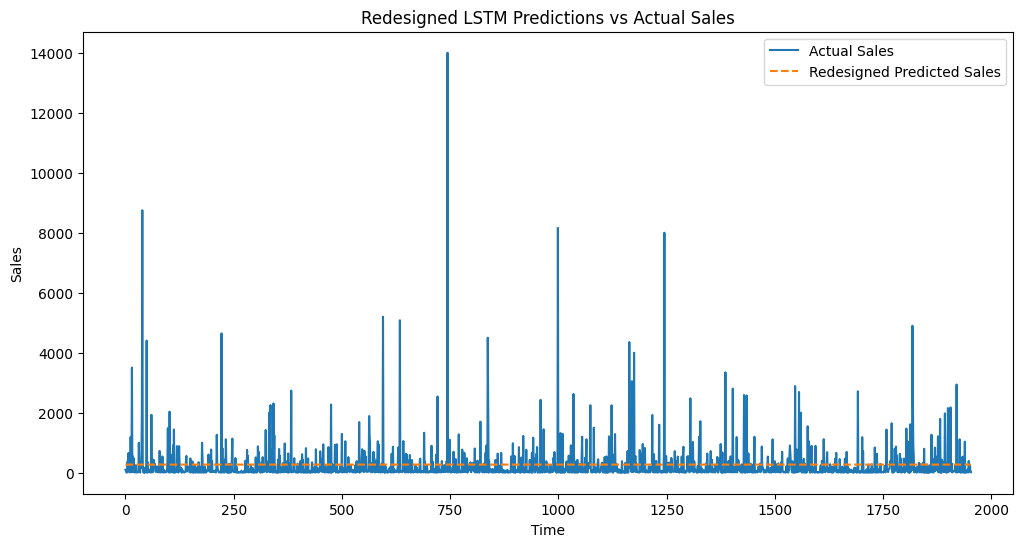

In [ ]:


# Plot predictions vs actual values for the redesigned model
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Sales")
plt.plot(redesigned_y_pred_rescaled, label="Redesigned Predicted Sales", linestyle="dashed")
plt.title("Redesigned LSTM Predictions vs Actual Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()


Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - loss: 6.3569e-04 - mae: 0.0115 - val_loss: 8.5345e-04 - val_mae: 0.0125 - learning_rate: 0.0010
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 6.9732e-04 - mae: 0.0115 - val_loss: 8.5599e-04 - val_mae: 0.0121 - learning_rate: 0.0010
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 7.0429e-04 - mae: 0.0114 - val_loss: 8.5472e-04 - val_mae: 0.0123 - learning_rate: 0.0010
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - loss: 7.5742e-04 - mae: 0.0120 - val_loss: 8.6120e-04 - val_mae: 0.0116 - learning_rate: 0.0010
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 8.4027e-04 - mae: 0.0116 - val_loss: 8.5615e-04 - val_mae: 0.0120 - learning_rate: 0.0010
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 6.6789e-04 - mae: 0.0118 - val_loss: 8.5947e-04 - val_mae: 0.0117 - learning_rate: 0.0010
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - loss: 5.9407e-04 - mae: 0

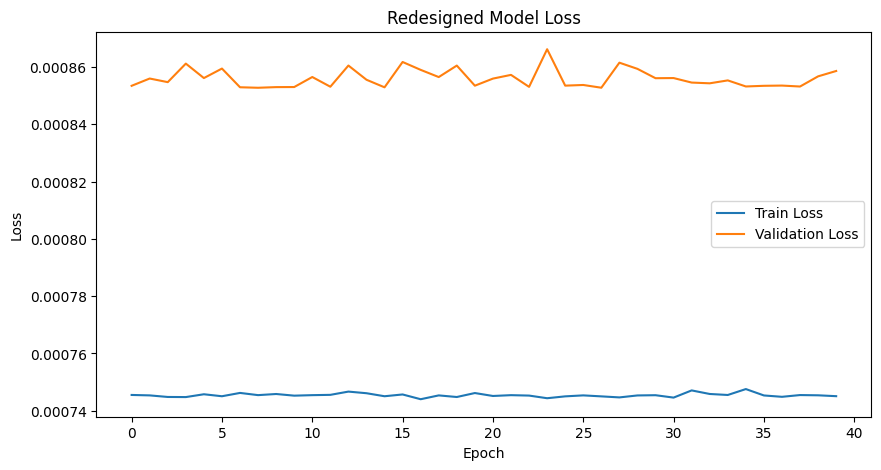

In [ ]:

from tensorflow.keras.callbacks import LearningRateScheduler

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * 0.5

lr_scheduler = LearningRateScheduler(scheduler)

# Train the redesigned model with a learning rate scheduler
redesigned_history = redesigned_model.fit(
    X_train, y_train,
    epochs=40,  # More epochs for better tuning
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(redesigned_history.history['loss'], label='Train Loss')
plt.plot(redesigned_history.history['val_loss'], label='Validation Loss')
plt.title('Redesigned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

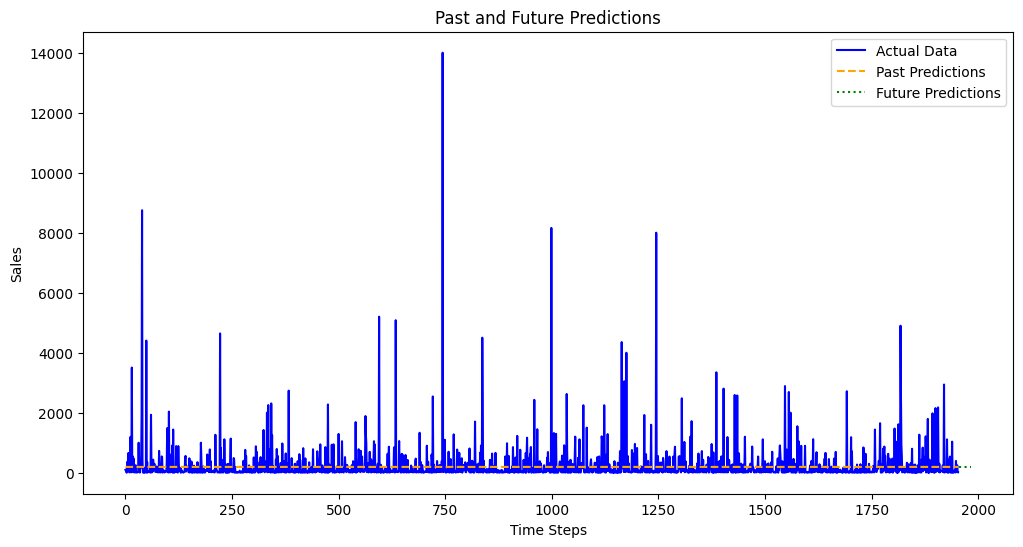

In [ ]:
# Predict on the test set (past data)
past_predictions = redesigned_model.predict(X_test)

# Convert predictions and true values back to original scale
past_predictions_rescaled = scaler.inverse_transform(past_predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare for future predictions
future_steps = 30  # Number of future time steps to predict
last_sequence = X_test[-1]  # Start with the last sequence from the test set
future_predictions = []

# Generate future predictions iteratively
for _ in range(future_steps):
    next_prediction = redesigned_model.predict(last_sequence.reshape(1, -1, 1))
    future_predictions.append(next_prediction[0, 0])  # Extract the scalar value
    # Update the sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_prediction).reshape(-1, 1)

# Scale future predictions back to original scale
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot past and future predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(y_test_rescaled, label="Actual Data", color="blue")

# Plot past predictions
plt.plot(past_predictions_rescaled, label="Past Predictions", linestyle="dashed", color="orange")

# Plot future predictions
plt.plot(
    range(len(y_test_rescaled), len(y_test_rescaled) + len(future_predictions_rescaled)),
    future_predictions_rescaled,
    label="Future Predictions",
    linestyle="dotted",
    color="green",
)

plt.title("Past and Future Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Sales")
plt.legend()
plt.show()
